# Program Summary
The program is building a simple Neural Network without any deep learning package

___
> 1. Include a dummuy variable value of which is one throughout all sample points so that we can get intercept value
> 2. Assign random weight to each of the variables and make prediction using dot product of the random weight and variable values
> 3. Using a cost function (cross entropy for example) to compute the loss of the target observations.
> 4. Calculate the derivatives of the cost function with respect to the weight and the bias
> 5. Update the weight and bias by mutiplying the weight and bias derivatives with learning rate
> 6. Iterate step 4 and 5 until the change in weights is insignificant 

Tutorial Link: https://towardsdatascience.com/step-by-step-guide-to-building-your-own-neural-network-from-scratch-df64b1c5ab6e

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

## Load Data

cat


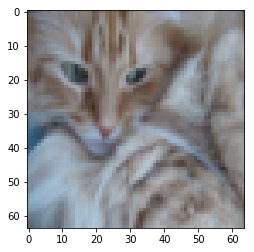

In [30]:
def load_dataset():
    train_dataset = h5py.File('Desktop/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('Desktop/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
plt.imshow(train_set_x_orig[2])
print(classes[np.squeeze(train_set_y[:,25])].decode('utf-8'))

## Flatten and Scale Data

In [6]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

## Initialize to Zeros

In [36]:
def initialize_with_zeros(dim):
    w = np.zeros(shape = (dim, 1))
    b = 0
    
    return w, b

## Activation Function - Sigmoid

In [40]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

## Forward and Backword Propagation
> - Cost function: Cross Entropy
> - Optimizer: Gradient Descent

In [49]:
def propagate(w, b, X, Y):
    #w: weight in transaction
    #b: bias
    #X: inputs
    #Y: obvervations
    m = X.shape[1]
    
    #Forward propagation
    Y_pre = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m) * np.sum(Y * np.log(Y_pre) + (1 - Y) * (np.log(1-Y_pre)))
    
    #Backward propagation
    dw = (1/m) * np.dot(X, (Y_pre - Y).T)
    db = (1/m) * np.sum(Y-Y_pre)
    
    assert(dw.shape == w.shape) #the number of Y_pre == number of X
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

## Optimer
> - Optimizer: Gradient Descent

In [51]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost  = False):
    
    costs = []
    
    
    for i in range(num_iterations):

        #Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        #Get derivatives
        dw = grads['dw']
        db = grads['db']
        
        #Update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        #Record costs
        if i % 100 == 0:
            costs.append(cost)
            
        #Print cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ('Cost after iteration %i: %f' %(i, cost))
            
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs

In [61]:
def predict(w, b , X):
    m = x.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    #Compute probability vector
    A = sigmoid(np.dot(w.T, X) + b)
    
#     for i in range(A.shape[1]):
#         Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    assert(Y_prediction.shape == (1, m))
    
    return [1 if x > 0.5 else 0 for x in A[0]]

In [62]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000,
         learning_rate = 0.5, print_cost = False):
    #Initialize parameters with 0s
    w, b = initialize_with_zeros(X_train.shape[0])
    
    #Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train,
                                        num_iterations, learning_rate, print_cost)
    
    #Retrive parameters w, b from dictionary
    w = parameters['w']
    b = parameters['b']
    
    #Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    #Print test/train errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - 
                                                            Y_train))*100))
    print("test accuracy: {}%".format(100 - np.mean(np.abs(Y_prediction_test - Y_test))*100))
    
    d = {'costs': costs, 'Y_prediction_test': Y_prediction_test,
         'Y_prediction_train': Y_prediction_train, 'w': w, 'b': b,
         'learning_rate': learning_rate, 'num_iterations': num_iterations}
    
    return d


In [81]:
length = 100000
d = model(train_set_x[:length], train_set_y[:length], test_set_x[:length], test_set_y[:length], num_iterations=2000,
         learning_rate = 0.006, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.649397
Cost after iteration 200: 0.537763
Cost after iteration 300: 0.438676
Cost after iteration 400: 0.349287
Cost after iteration 500: 0.278268
Cost after iteration 600: 0.249822
Cost after iteration 700: 0.231222
Cost after iteration 800: 0.215261
Cost after iteration 900: 0.201361
Cost after iteration 1000: 0.189125
Cost after iteration 1100: 0.178259
Cost after iteration 1200: 0.168539
Cost after iteration 1300: 0.159791
Cost after iteration 1400: 0.151875
Cost after iteration 1500: 0.144676
Cost after iteration 1600: 0.138103
Cost after iteration 1700: 0.132077
Cost after iteration 1800: 0.126534
Cost after iteration 1900: 0.121419
train accuracy: 99.52153110047847 %
test accuracy: 68.0%


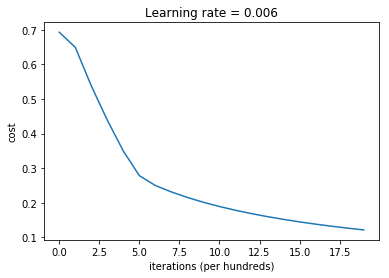

In [83]:
plt.plot(d['costs'])
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()